In [23]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris

In [24]:
#loading dataset
iris=load_iris()
data=iris.data
feature_names=iris.feature_names
y=iris.target
df=pd.DataFrame(data,columns=feature_names)
df["classes"]=y
x=data
from sklearn.decomposition import PCA
pca=PCA(n_components=2 , whiten=True)
pca.fit(x)
x_pca=pca.transform(x)
print("Ratio of variance",pca.explained_variance_ratio_)
print("Total",sum(pca.explained_variance_ratio_))

Ratio of variance [0.92461872 0.05306648]
Total 0.9776852063187949


In [25]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     classes  
0          0

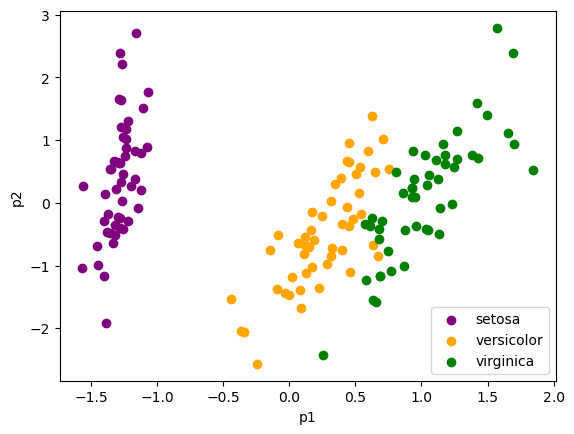

In [26]:
#first component
df["p1"]=x_pca[:,0]
#second component
df["p2"]=x_pca[:,1]
color=["purple","orange","green"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.classes==each] , df.p2[df.classes==each], color=color[each], label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [31]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [32]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [34]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [35]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [38]:
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(569, 30)

In [40]:
x_pca.shape

(569, 2)

In [41]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [42]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second component')

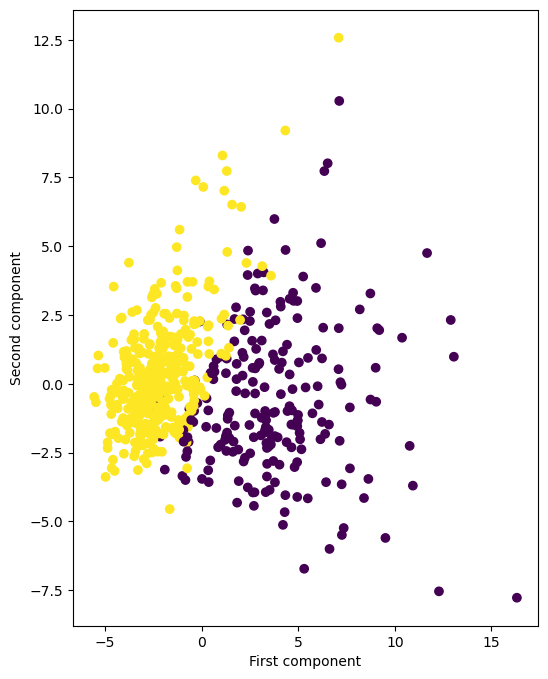

In [43]:
plt.figure(figsize=(6,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First component')
plt.ylabel('Second component')

In [44]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [45]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [47]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [48]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [49]:
X.head(10)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [50]:
Y = df[['body_shape']]

In [51]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [53]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [54]:
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [57]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors %s' %eig_vecs)

Eigenvectors [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [58]:
eig_vals[0] / sum(eig_vals)

0.7318321731427544

In [61]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [63]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

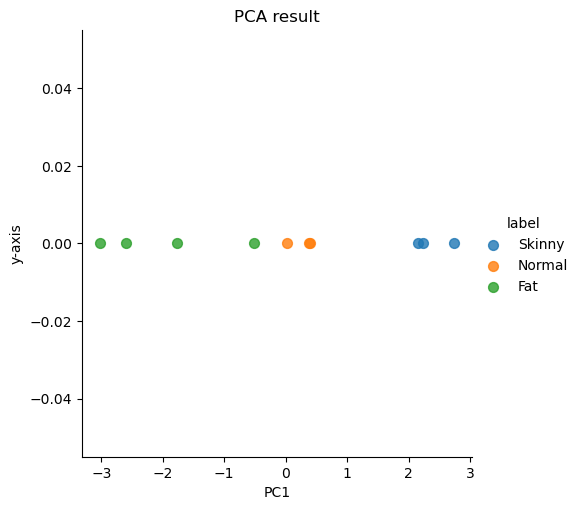

In [64]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  
           scatter_kws={"s": 50}, 
           hue="label")
plt.title('PCA result')